In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math,copy

In [2]:
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453])
data_set=pd.read_csv('Gold Price (2013-2023).csv')
data_set.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%


In [3]:
data_set.shape

(2583, 7)

In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [5]:
data_set.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,5
Change %,0


In [6]:
data_set.drop(['Vol.', 'Change %'], axis=1, inplace=True)

In [7]:
data_set.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0


In [8]:
data_set['Date'] = pd.to_datetime(data_set['Date'])
data_set.sort_values(by='Date', ascending=True, inplace=True)
data_set.reset_index(drop=True, inplace=True)
print(data_set.dtypes)

Date     datetime64[ns]
Price            object
Open             object
High             object
Low              object
dtype: object


In [9]:
NumCols = data_set.columns.drop(['Date'])
data_set[NumCols] = data_set[NumCols].replace({',': ''}, regex=True)
data_set[NumCols] = data_set[NumCols].astype('float64')


In [10]:
data_set.head()

,Date,Price,Open,High,Low
0,2013-01-02,1689.9,1675.8,1695.0,1672.1
1,2013-01-03,1675.6,1688.0,1689.3,1664.3
2,2013-01-04,1649.9,1664.4,1664.4,1630.0
3,2013-01-07,1647.2,1657.3,1663.8,1645.3
4,2013-01-08,1663.2,1651.5,1662.6,1648.8


In [11]:
data_set.describe()

,Date,Price,Open,High,Low
count,2583,2583.000000,2583.000000,2583.000000,2583.000000
mean,2018-01-02 02:17:08.571428608,1440.326442,1440.646477,1449.639934,1430.886876
min,2013-01-02 00:00:00,1049.600000,1051.500000,1060.100000,1045.400000
25%,2015-07-02 12:00:00,1244.200000,1244.350000,1251.600000,1236.450000
50%,2018-01-03 00:00:00,1320.500000,1320.700000,1326.500000,1313.200000
75%,2020-07-04 12:00:00,1713.950000,1711.950000,1723.000000,1699.450000
max,2022-12-30 00:00:00,2058.400000,2065.100000,2078.700000,2037.200000
std,NaN,257.338282,257.503397,259.633923,254.753279


In [12]:
corleation = data_set.corr()

<Axes: >

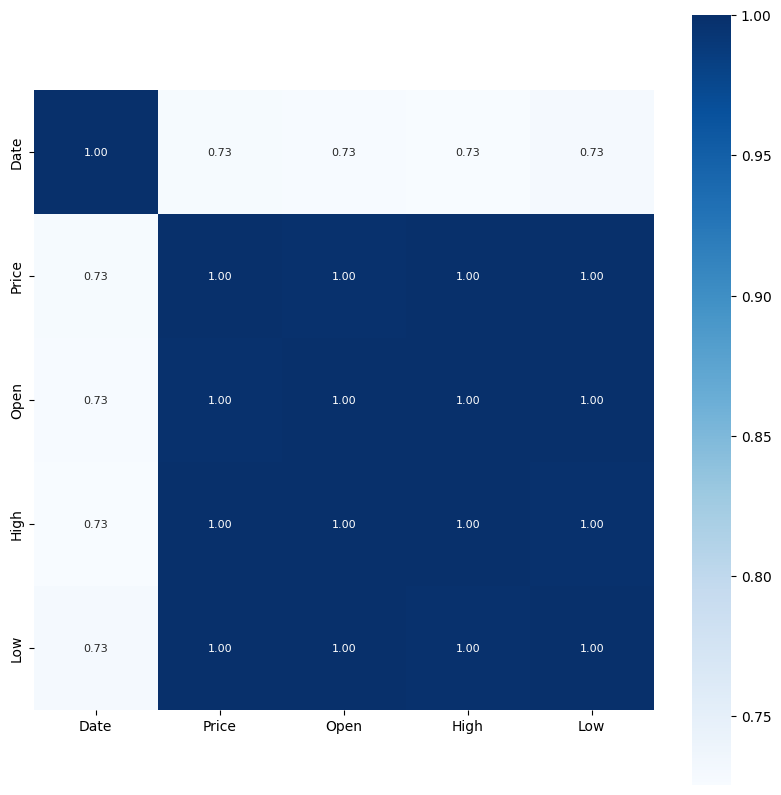

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(corleation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

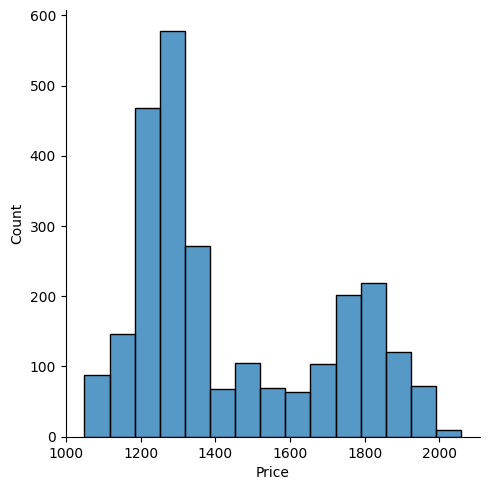

In [14]:
sns.displot(data_set['Price'])

In [15]:
X=data_set.drop( ['Price','Date'], axis=1)
Y=data_set['Price']

In [16]:
print(X)
print(Y)

        Open     High      Low
0     1675.8  1695.00  1672.10
1     1688.0  1689.30  1664.30
2     1664.4  1664.40  1630.00
3     1657.3  1663.80  1645.30
4     1651.5  1662.60  1648.80
...      ...      ...      ...
2578  1805.8  1811.95  1805.55
2579  1808.2  1841.90  1808.00
2580  1822.4  1822.80  1804.20
2581  1812.3  1827.30  1811.20
2582  1821.8  1832.40  1819.80

[2583 rows x 3 columns]
0       1689.9
1       1675.6
2       1649.9
3       1647.2
4       1663.2
         ...  
2578    1809.7
2579    1823.1
2580    1815.8
2581    1826.0
2582    1826.2
Name: Price, Length: 2583, dtype: float64


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)


In [18]:
def predict(X,w,b):
  p=np.dot(X,w)+b
  return p

In [19]:
def compute_cost(X,Y,w,b):
  m=X.shape[0]
  cost=0.0
  for i in range(m):
    f_wb=np.dot(X[i],w)+b
    cost=cost+(f_wb-Y[i])**2
  cost=cost/(2*m)
  return cost

In [20]:
def computer_gradient(X,Y,w,b):
  m,n=X.shape
  dj_dw=np.zeros((n,))
  dj_db=0
  for i in range(m):
    err=(np.dot(X[i],w)+b)-Y[i]
    for j in range(n):
      dj_dw[j]=dj_dw[j]+err*X[i,j]
    dj_db=dj_db+err
  dj_dw=dj_dw/m
  dj_db=dj_db/m
  return dj_dw,dj_db


In [21]:
def gradient_descent(X,Y,w_in,b_in,cost_function,computer_gradient,alpha,num_iters):
  j_history=[]
  w=copy.deepcopy(w_in)
  b=b_in
  for i in range(num_iters):
    dj_dw,dj_db=computer_gradient(X,Y,w,b)
    w=w-(alpha*dj_dw)
    b=b-(alpha*dj_db)

    if i<100000:
        j_history.append( cost_function(X, Y, w, b))

    if i% math.ceil(num_iters / 10) == 0:

        print(f"Iteration {i:4d}: Cost {j_history[-1]}")

  return w,b,j_history

In [22]:
intial_w=np.zeros_like(w_init)
intial_b=0.
iterations=10000
alpha=1.0e-7
w_final, b_final, J_hist=gradient_descent(X_train,Y_train,intial_w,intial_b,compute_cost,computer_gradient,alpha,iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {Y_train[i]}")

Iteration    0: Cost 139909.42334630343
Iteration 1000: Cost 36.77491285890865
Iteration 2000: Cost 36.58435697546697
Iteration 3000: Cost 36.39540559386916
Iteration 4000: Cost 36.20804451905697
Iteration 5000: Cost 36.022259690407296
Iteration 6000: Cost 35.838037180350526
Iteration 7000: Cost 35.6553631930038
Iteration 8000: Cost 35.47422406281959
Iteration 9000: Cost 35.29460625324958
b,w found by gradient descent: 0.00,[0.29850396 0.34952861 0.35204058] 
prediction: 1325.44, target value: 1320.4
prediction: 1158.94, target value: 1157.7
prediction: 1265.16, target value: 1271.8
prediction: 1951.69, target value: 1955.3
prediction: 1771.59, target value: 1780.3
prediction: 1220.12, target value: 1211.4
prediction: 1289.59, target value: 1290.2
prediction: 1813.29, target value: 1797.4
prediction: 1788.77, target value: 1796.9
prediction: 1801.22, target value: 1797.7
prediction: 1497.95, target value: 1496.4
prediction: 1568.07, target value: 1578.6
prediction: 1857.40, target valu

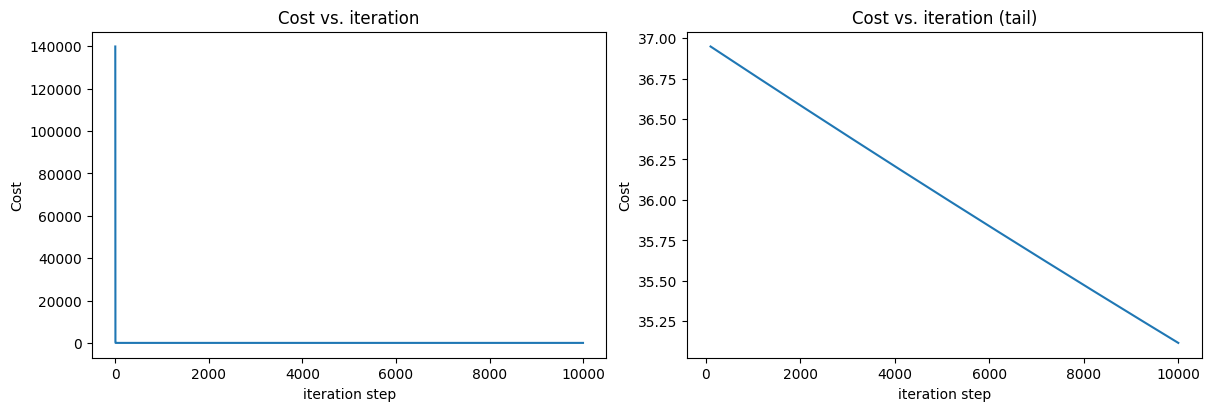

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()